# Gambler's Problem

# Dynamic Programming: Value Iteration
- Space of States: \[0..100\]
- Space of Actions: \[0..100\] 
- Space of valid actions for a state `s` :\[ 0.. min(s, 100 - s)\] 

# Importing Packages

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Parameters

In [60]:
params = {
    "goal": 100,
    "theta": 0.01,
    "gamma": 1,
    "prob_win": 0.5,
    "num_iters": 1000,
    "policy_iter": 10
}

In [51]:
def Initialise(params):
    """Intialises value function
    
    Args:
        params (dict): Dictionary of parameters

    Returns:
        value (ndarray): Value initialised to zero with shape (size of goal + 1,)
    """
    value = np.zeros(params["goal"]+1)
    return value
def PolicyEvalImprove(old_value, params):
    """One iteration of Value Iteration by updating the value with maximum expected reward
    
    Args:
        old_value (ndarray): Old value function
        params (dict): Dictionary of parameters

    Returns:
        value (ndarray): Returns the updated value function
    """
    value = np.copy(old_value)
    delta = 0
    for itr in range(params["policy_iter"]):
        delta = 0
        for s in range(1, params["goal"]):
            maxm = 0
            for a in range(1, min(s, params["goal"]-s)+1):
                exp_reward = params["prob_win"] * ( ((s+a) == params["goal"]) + params["gamma"] * value[s+a] )
                exp_reward += (1 - params["prob_win"]) * ( ((s-a) == params["goal"]) + params["gamma"] * value[s-a])
                maxm = max(maxm, exp_reward)
            delta = max(delta, abs(maxm - value[s]))
            value[s] = maxm
        if(delta < params["theta"]):
            break
    return value
def GetPolicy(value, params):
    """Retrieves the optimal policy from optimal value function greedily
    
    Args:
        value (ndarray): The optimal value function
        params (dict): Dictionary of parameters

    Returns:
        policy (ndarray): Policy function with shape (size of goals + 1,)
    """
    policy = np.zeros(params["goal"]+1)
    for s in range(1,params["goal"]):
        maxm = 0
        argmaxa = 1
        for a in range(1, min(s, params["goal"]-s)+1):
            exp_reward = params["prob_win"] * ( ((s+a) == params["goal"]) + params["gamma"] * value[s+a] )
            exp_reward += (1 - params["prob_win"]) * ( ((s-a) == params["goal"]) + params["gamma"] * value[s-a])
            if(exp_reward > maxm):
                maxm = exp_reward
                argmaxa = a
        policy[s] = argmaxa
    return policy

In [52]:
def ValueIteration(params):
    """Implements Value Iteration
    
    Args:
        params (dict): Dictionary of parameters

    Returns:
        None
    """
    value = Initialise(params)
    for i in range(params["num_iters"]):
        updated_value = PolicyEvalImprove(value, params)
        print("Iteration: ", i+1, "Delta norm: ", np.linalg.norm(updated_value-value))
        if (updated_value == value).all():
            break
        else:
            value = updated_value
    
    policy = GetPolicy(value, params)
    plt.plot(policy[1:params["goal"]])

Iteration:  1 Delta norm:  5.730178033130409
Iteration:  2 Delta norm:  0.002006172424111602
Iteration:  3 Delta norm:  0.0002291445985522769
Iteration:  4 Delta norm:  5.483657756889942e-06
Iteration:  5 Delta norm:  8.49705823118669e-09
Iteration:  6 Delta norm:  2.0394946030293262e-09
Iteration:  7 Delta norm:  4.739574995165997e-11
Iteration:  8 Delta norm:  1.540101446428445e-12
Iteration:  9 Delta norm:  6.330931351443327e-14
Iteration:  10 Delta norm:  2.8334062230696084e-15
Iteration:  11 Delta norm:  6.415944603006379e-16
Iteration:  12 Delta norm:  5.020548682536777e-16
Iteration:  13 Delta norm:  4.637295813494384e-16
Iteration:  14 Delta norm:  4.1340320322907796e-16
Iteration:  15 Delta norm:  3.61975732328332e-16
Iteration:  16 Delta norm:  2.6999899566590055e-16
Iteration:  17 Delta norm:  2.0029859748389804e-16
Iteration:  18 Delta norm:  1.241873016165035e-16
Iteration:  19 Delta norm:  5.551115123125783e-17
Iteration:  20 Delta norm:  0.0


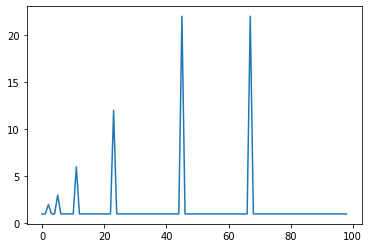

In [61]:
ValueIteration(params)